In [1]:
import sqlite3
import matplotlib.pyplot as plt
import re

In [2]:
database = "databases/conveyor_restack.db"

In [3]:
con = sqlite3.connect(database)
cur = con.cursor()

In [4]:
# Create new table for this experiment
cur.execute("CREATE TABLE IF NOT EXISTS temp_expt AS SELECT * FROM experiments WHERE date=:date AND time=:time", {"date": date, "time": time})

NameError: name 'date' is not defined

In [5]:
print(cur.execute("SELECT * FROM experiments").fetchall())

[('../experiments/conveyor_restack/conveyor_domain_transfer.pddl', '../experiments/conveyor_restack/conveyor_restack_2.05.pddl', '2022_01_24', '11:33:28', 1, 0.002657, 0.000106, 1277.923387, 10, -1, 1444.511034, 'Grounded: 0.002657 \nAlgebra: 0.000106 \nEncoded 1: 0.009975 \nUNSAT Solution 1: 0.006423 \nEncoded 2: 0.013247 \nUNSAT Solution 2: 0.018697 \nEncoded 3: 0.012990 \nUNSAT Solution 3: 0.037454 \nEncoded 4: 0.013385 \nUNSAT Solution 4: 0.056092 \nEncoded 5: 0.013513 \nUNSAT Solution 5: 0.117183 \nEncoded 6: 0.013487 \nUNSAT Solution 6: 0.269549 \nEncoded 7: 0.013865 \nUNSAT Solution 7: 2.281160 \nEncoded 8: 0.013942 \nUNSAT Solution 8: 13.437791 \nEncoded 9: 0.014407 \nUNSAT Solution 9: 150.224310 \nEncoded 10: 0.014098 \n0.0:\t(transfer-from-conveyor a temp) [2.0]\n10.0:\t(transfer-from-conveyor b goal) [2.0]\n13.0:\t(transfer a temp b) [2.0]\n15.5:\t(transfer-from-conveyor c a) [2.0]\nSAT Solution: 1277.923387 \nIterations: 10 \nTotal time: 1444.511034 \n', None), ('../experim

NameError: name 'date' is not defined

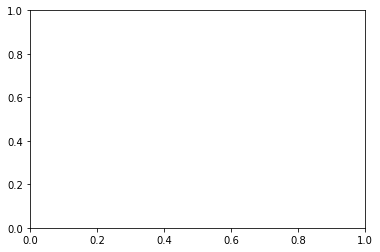

In [16]:
sat_expts = [x[0] for x in cur.execute("SELECT total_time FROM experiments WHERE sat=1").fetchall()]
fig1, ax1 = plt.subplots()
fig1.set_facecolor((1, 1, 1))
ax1.set_title("Experiment {}-{} Solution Times".format(date, time))
ax1.set(ylabel='Time (s)')
ax1.get_xaxis().set_visible(False)
ax1.boxplot(sat_expts)


In [15]:
num_sat_expts = len(sat_expts)
num_total_expts = len(cur.execute("SELECT * FROM temp_expt").fetchall())
percentage_sat = num_sat_expts / float(num_total_expts) * 100

fig2, ax2 = plt.subplots()
fig2.set_facecolor((1, 1, 1))
ax2.set_title("Experiment {}-{} SAT Percentage".format(date, time))
ax2.get_xaxis().set_visible(False)
ax2.set_ylim([0,100])
ax2.set_xlim([-1,1])
bar = ax2.bar(0, percentage_sat)

# Display percentage below top of bar
for b in bar:
    w = b.get_width()
    h = b.get_height()
    x, y = b.get_xy()
     
    ax2.text(x+w/2,
             y+h*0.94,
             str(percentage_sat)+'%',
             ha='center',
             weight='bold')

NameError: name 'sat_expts' is not defined

In [ ]:
expt_logs = cur.execute("SELECT log FROM temp_expt").fetchall()
print(expt_logs[0][0])

In [ ]:
ex = cur.execute("select problem from experiments").fetchall()[1]
print(ex)

In [6]:
cur.execute("ALTER TABLE experiments ADD COLUMN delta_t REAL")

OperationalError: duplicate column name: delta_t

In [13]:
for prob in cur.execute("SELECT problem FROM experiments").fetchall():
    prob = prob[0]
    rslt = re.search(".*(?<=\/conveyor_restack_)(\d*.?\d*).pddl", prob)
    delta_t = float(rslt.group(1))
    #print("UPDATE experiments SET delta_t={} WHERE problem=\'{}\'".format(delta_t, prob))
    cur.execute("UPDATE experiments SET delta_t={} WHERE problem=\'{}\'".format(delta_t, prob))

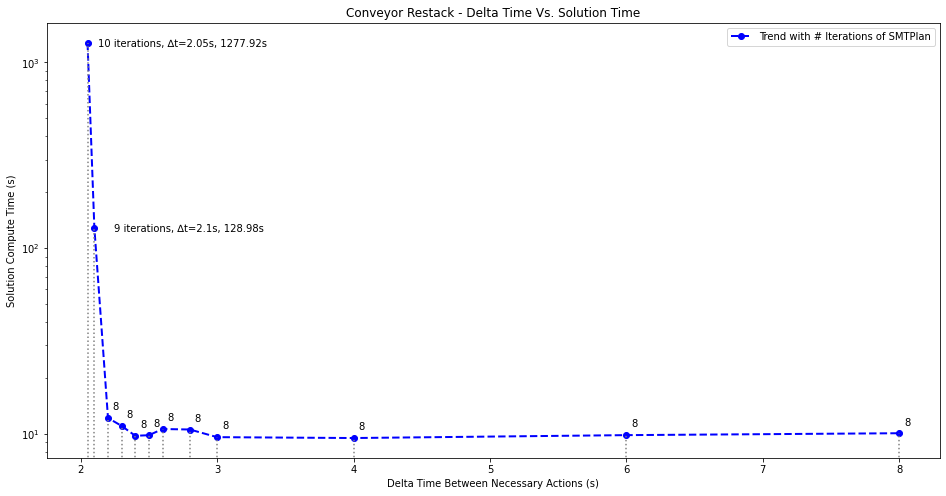

In [84]:
d = cur.execute("SELECT delta_t, sol_time, iterations FROM experiments ORDER BY delta_t ASC").fetchall()

fig3, ax3 = plt.subplots(figsize=(16,8))
fig3.set_facecolor((1, 1, 1))
ax3.set_title("Conveyor Restack - Delta Time Vs. Solution Time")
ax3.set_yscale('log')
ax3.set(xlabel='Delta Time Between Necessary Actions (s)',ylabel='Solution Compute Time (s)')
plot = ax3.plot([x[0] for x in d], [x[1] for x in d], color='blue', lw=2, linestyle='--', marker='o', label='Trend with # Iterations of SMTPlan')
ax3.legend()

for x,y,i in d:
    label = "{}".format(i)
    if x == 2.05 or x == 2.1:
        label = "{} iterations, ∆t={}s, {:.2f}s".format(i,x,y)
        ax3.annotate(label, (x,y), textcoords="offset points", xytext=(95,-4), ha='center')
    else:
        label = "{}".format(i)
        ax3.annotate(label, (x,y), textcoords="offset points", xytext=(8,8), ha='center')
    ax3.vlines(x, ymin=0, ymax=y, colors='gray', linestyles='dotted')

    


In [40]:
[x[0] for x in d]

[2.05, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8, 3.0, 4.0, 6.0, 8.0]

In [41]:
d

[(2.05, 1277.923387),
 (2.1, 128.982895),
 (2.2, 12.187108),
 (2.3, 11.043447),
 (2.4, 9.772288),
 (2.5, 9.842465),
 (2.6, 10.628214),
 (2.8, 10.564387),
 (3.0, 9.608568),
 (4.0, 9.504428),
 (6.0, 9.852201),
 (8.0, 10.087659)]